# CZII YOLO11 Training Baseline
 We created a training set adapted to YOLO from [the dataset baseline](https://www.kaggle.com/code/itsuki9180/czii-making-datasets-for-yolo).

In this notebook, we actually use it to train YOLO so that it can infer the xy coordinates of particles through 2D object detection.

# Install and Import modules

In [1]:
# !tar xfvz /kaggle/input/ultralytics-for-offline-install/archive.tar.gz
# !pip install --no-index --find-links=./packages ultralytics
# !rm -rf ./packages

./packages/
./packages/pandas-2.2.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
./packages/nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl
./packages/numpy-2.1.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
./packages/psutil-6.1.0-cp36-abi3-manylinux_2_12_x86_64.manylinux2010_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl
./packages/nvidia_nvtx_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl
./packages/nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl
./packages/charset_normalizer-3.4.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
./packages/nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl
./packages/torch-2.5.1-cp310-cp310-manylinux1_x86_64.whl
./packages/matplotlib-3.9.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
./packages/tqdm-4.67.1-py3-none-any.whl
./packages/networkx-3.4.2-py3-none-any.whl
./packages/typing_extensions-4.12.2-py3-none-any.whl
./packages/fonttools-4.55.1

In [1]:
from tqdm import tqdm
import glob, os
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# Prepare to train and instance YOLOmodel

In [2]:
# Load a pretrained model
model = YOLO("yolo11l.pt")  # load a pretrained model (recommended for training)

100%|██████████| 49.0M/49.0M [00:05<00:00, 10.1MB/s]


# Let's train YOLO!

In [5]:
# Train the model
_ = model.train(
    data="../../proc/yolo11/czii_conf.yaml",
    epochs=100,
    warmup_epochs=10,
    optimizer='AdamW',
    cos_lr=True,
    lr0=3e-4,
    lrf=0.03,
    imgsz=640,
    device="0",
    weight_decay=0.005,
    batch=32,
    scale=0,
    flipud=0.5,
    fliplr=0.5,
    degrees=45,
    shear=5,
    mixup=0.2,
    copy_paste=0.25,
    seed=8620, # (｡•◡•｡)
)

Ultralytics 8.3.53 🚀 Python-3.11.10 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24210MiB)
engine/trainer: task=detect, mode=train, model=yolo11l.pt, data=../../proc/yolo11/czii_conf.yaml, epochs=100, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=8620, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sho

100%|██████████| 755k/755k [00:00<00:00, 930kB/s] 


Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  2    173824  ultralytics.nn.modules.block.C3k2            [128, 256, 2, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  2    691712  ultralytics.nn.modules.block.C3k2            [256, 512, 2, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  2   2234368  ultralytics.nn.modules.block.C3k2            [512, 512, 2, True]           
  7                  -1  1   2360320  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 10.3MB/s]


AMP: checks passed ✅


train: Scanning /workspace/CZII/proc/yolo11/datasets/czii_det2d/labels/train... 1104 images, 272 backgrounds, 0 corrupt: 100%|██████████| 1104/1104 [00:07<00:00, 146.76it/s]

train: New cache created: /workspace/CZII/proc/yolo11/datasets/czii_det2d/labels/train.cache



val: Scanning /workspace/CZII/proc/yolo11/datasets/czii_det2d/labels/val... 184 images, 30 backgrounds, 0 corrupt: 100%|██████████| 184/184 [00:01<00:00, 117.54it/s]

val: New cache created: /workspace/CZII/proc/yolo11/datasets/czii_det2d/labels/val.cache


Plotting labels to /workspace/CZII/runs/detect/train2/labels.jpg... 
optimizer: AdamW(lr=0.0003, momentum=0.937) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.005), 173 bias(decay=0.0)


2024/12/22 03:33:28 INFO mlflow.tracking.fluent: Experiment with name '/Shared/Ultralytics' does not exist. Creating a new experiment.
2024/12/22 03:33:28 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2024/12/22 03:33:28 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.


MLflow: logging run_id(2f242a72f81f4b1590bbf341f8c227de) to /workspace/CZII/runs/mlflow
MLflow: view at http://127.0.0.1:5000 with 'mlflow server --backend-store-uri /workspace/CZII/runs/mlflow'
MLflow: disable with 'yolo settings mlflow=False'
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /workspace/CZII/runs/detect/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      21.6G      2.188      2.696      1.601        390        640: 100%|██████████| 35/35 [00:11<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.07it/s]

                   all        184       2640      0.145     0.0356     0.0782     0.0084



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      21.3G      1.336      1.384      1.093        422        640: 100%|██████████| 35/35 [00:11<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.68it/s]

                   all        184       2640      0.419      0.333      0.361       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100        21G      1.222      1.225      1.047        307        640: 100%|██████████| 35/35 [00:11<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.72it/s]

                   all        184       2640      0.518      0.501       0.49      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      21.1G      1.234      1.233      1.048        398        640: 100%|██████████| 35/35 [00:11<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.42it/s]

                   all        184       2640      0.501      0.504      0.526      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      21.2G      1.192      1.201      1.035        589        640: 100%|██████████| 35/35 [00:11<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.46it/s]

                   all        184       2640      0.601      0.613      0.581      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      21.1G      1.142      1.151      1.017        387        640: 100%|██████████| 35/35 [00:10<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.53it/s]

                   all        184       2640       0.57      0.595      0.603      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      21.3G      1.126      1.124       1.01        470        640: 100%|██████████| 35/35 [00:10<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.55it/s]

                   all        184       2640      0.582      0.617      0.605      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      21.2G      1.137       1.11      1.015        354        640: 100%|██████████| 35/35 [00:10<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.62it/s]

                   all        184       2640       0.57      0.602      0.596      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      21.3G      1.116      1.105      1.008        395        640: 100%|██████████| 35/35 [00:10<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.66it/s]

                   all        184       2640      0.544      0.552      0.575      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      21.2G      1.094      1.101     0.9976        451        640: 100%|██████████| 35/35 [00:10<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.56it/s]

                   all        184       2640      0.562      0.597      0.605      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      21.3G      1.088      1.091     0.9975        301        640: 100%|██████████| 35/35 [00:10<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]

                   all        184       2640      0.594      0.571      0.591      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100        21G      1.108      1.095      1.003        481        640: 100%|██████████| 35/35 [00:10<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.58it/s]

                   all        184       2640      0.545      0.633      0.583       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      21.3G      1.097      1.084     0.9998        521        640: 100%|██████████| 35/35 [00:10<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.59it/s]

                   all        184       2640      0.702       0.53      0.618      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      21.2G      1.067       1.07     0.9871        365        640: 100%|██████████| 35/35 [00:10<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]

                   all        184       2640      0.556       0.59      0.606      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      21.1G      1.089      1.068     0.9917        345        640: 100%|██████████| 35/35 [00:10<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.42it/s]

                   all        184       2640      0.556      0.601      0.614      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      21.4G       1.08       1.04     0.9903        349        640: 100%|██████████| 35/35 [00:10<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.50it/s]

                   all        184       2640      0.527      0.601      0.599      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      21.2G      1.058      1.012     0.9843        401        640: 100%|██████████| 35/35 [00:10<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.61it/s]

                   all        184       2640      0.535      0.592      0.597      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      21.1G      1.044      1.019     0.9784        337        640: 100%|██████████| 35/35 [00:10<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.62it/s]

                   all        184       2640      0.538      0.576      0.572      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      21.2G      1.075      1.017     0.9894        432        640: 100%|██████████| 35/35 [00:10<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.64it/s]

                   all        184       2640      0.607      0.561      0.606      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      21.1G      1.053      1.002     0.9813        356        640: 100%|██████████| 35/35 [00:10<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.68it/s]

                   all        184       2640      0.568      0.596      0.609      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      21.3G      1.034      1.002      0.972        430        640: 100%|██████████| 35/35 [00:10<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.59it/s]

                   all        184       2640      0.574      0.554      0.599      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      21.4G      1.017     0.9706     0.9689        388        640: 100%|██████████| 35/35 [00:10<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.64it/s]

                   all        184       2640      0.622      0.612      0.639      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      21.1G       1.02     0.9974      0.969        405        640: 100%|██████████| 35/35 [00:10<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.56it/s]

                   all        184       2640      0.585      0.606      0.611      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      21.2G     0.9969     0.9618     0.9596        352        640: 100%|██████████| 35/35 [00:10<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.65it/s]

                   all        184       2640      0.567      0.622      0.615      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      21.2G      1.001     0.9509     0.9613        370        640: 100%|██████████| 35/35 [00:10<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.65it/s]

                   all        184       2640       0.59      0.412       0.56      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      21.4G     0.9905     0.9338     0.9582        427        640: 100%|██████████| 35/35 [00:10<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.69it/s]

                   all        184       2640      0.593      0.558       0.61      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      21.4G     0.9873      0.918     0.9564        445        640: 100%|██████████| 35/35 [00:10<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.56it/s]

                   all        184       2640      0.618      0.606      0.614      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      21.4G     0.9832     0.9135     0.9555        339        640: 100%|██████████| 35/35 [00:10<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.75it/s]

                   all        184       2640      0.568      0.542       0.58       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      21.1G     0.9732     0.8897     0.9508        444        640: 100%|██████████| 35/35 [00:10<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.65it/s]

                   all        184       2640      0.575      0.566      0.582      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      21.4G     0.9663     0.8944     0.9469        356        640: 100%|██████████| 35/35 [00:10<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.66it/s]

                   all        184       2640      0.587      0.601      0.597      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      21.3G     0.9604     0.8824     0.9461        464        640: 100%|██████████| 35/35 [00:10<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.69it/s]

                   all        184       2640      0.588      0.568      0.584      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      21.2G     0.9616     0.8798     0.9443        513        640: 100%|██████████| 35/35 [00:10<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.63it/s]

                   all        184       2640      0.552      0.591      0.595      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      21.4G     0.9361     0.8534     0.9383        524        640: 100%|██████████| 35/35 [00:10<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.66it/s]

                   all        184       2640      0.598      0.542      0.575      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      21.1G     0.9381     0.8398     0.9391        443        640: 100%|██████████| 35/35 [00:10<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.68it/s]

                   all        184       2640      0.574      0.602      0.591      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      21.3G     0.9312     0.8506     0.9377        438        640: 100%|██████████| 35/35 [00:10<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.67it/s]

                   all        184       2640      0.584      0.575      0.605       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      21.3G     0.9291     0.8455      0.937        447        640: 100%|██████████| 35/35 [00:10<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.80it/s]

                   all        184       2640      0.607      0.548       0.58      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100        21G       0.91     0.8107      0.929        452        640: 100%|██████████| 35/35 [00:10<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.35it/s]

                   all        184       2640      0.582      0.509      0.534      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      21.1G     0.9221     0.8098     0.9331        485        640: 100%|██████████| 35/35 [00:10<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.71it/s]

                   all        184       2640      0.553      0.575      0.574      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      21.8G     0.9132     0.8066     0.9299        506        640: 100%|██████████| 35/35 [00:10<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.68it/s]

                   all        184       2640      0.573      0.564      0.567      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      21.1G      0.898     0.7922     0.9238        296        640: 100%|██████████| 35/35 [00:10<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.73it/s]

                   all        184       2640      0.552      0.557      0.577      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      21.1G     0.8878     0.7842     0.9238        372        640: 100%|██████████| 35/35 [00:10<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.70it/s]

                   all        184       2640      0.568      0.566      0.575      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      21.4G      0.885     0.7678     0.9197        302        640: 100%|██████████| 35/35 [00:10<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.75it/s]

                   all        184       2640      0.608      0.572      0.602       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      21.2G     0.8709     0.7461     0.9158        327        640: 100%|██████████| 35/35 [00:10<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.69it/s]

                   all        184       2640      0.603      0.524      0.575      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100        21G     0.8563     0.7453     0.9126        422        640: 100%|██████████| 35/35 [00:10<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.77it/s]

                   all        184       2640      0.624      0.543      0.574      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      21.5G     0.8409     0.7278      0.905        341        640: 100%|██████████| 35/35 [00:10<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.74it/s]

                   all        184       2640      0.624       0.55      0.596       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      21.1G     0.8478     0.7378     0.9097        452        640: 100%|██████████| 35/35 [00:10<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.75it/s]

                   all        184       2640      0.592      0.554       0.58      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      21.4G     0.8227     0.7122     0.9031        464        640: 100%|██████████| 35/35 [00:10<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.70it/s]

                   all        184       2640      0.637      0.549      0.592      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100        21G     0.8251     0.7037      0.904        477        640: 100%|██████████| 35/35 [00:10<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.72it/s]

                   all        184       2640      0.572      0.572      0.578      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      21.2G     0.8265     0.6997     0.8998        378        640: 100%|██████████| 35/35 [00:10<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.76it/s]

                   all        184       2640      0.587      0.541      0.576      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      21.2G     0.8066     0.6765     0.8978        341        640: 100%|██████████| 35/35 [00:10<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.77it/s]

                   all        184       2640      0.589      0.565      0.586       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      21.4G     0.8123     0.6856     0.9011        428        640: 100%|██████████| 35/35 [00:10<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.68it/s]

                   all        184       2640      0.575      0.542      0.568       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      21.3G     0.8061     0.6847     0.8972        413        640: 100%|██████████| 35/35 [00:10<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.76it/s]

                   all        184       2640      0.607      0.525      0.556      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      21.1G     0.7874     0.6651      0.893        320        640: 100%|██████████| 35/35 [00:10<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.73it/s]

                   all        184       2640      0.605      0.482      0.565      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      21.3G     0.7716     0.6428     0.8861        414        640: 100%|██████████| 35/35 [00:10<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.72it/s]

                   all        184       2640      0.623      0.569      0.598      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      21.3G     0.7716      0.646     0.8869        492        640: 100%|██████████| 35/35 [00:10<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.75it/s]

                   all        184       2640      0.603      0.528      0.568      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      21.2G     0.7617     0.6417     0.8858        455        640: 100%|██████████| 35/35 [00:10<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.71it/s]

                   all        184       2640      0.601       0.52      0.566      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      21.3G     0.7702     0.6326     0.8879        525        640: 100%|██████████| 35/35 [00:10<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.73it/s]

                   all        184       2640      0.584      0.529      0.582      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      21.1G     0.7557     0.6258     0.8842        540        640: 100%|██████████| 35/35 [00:10<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.76it/s]

                   all        184       2640      0.583      0.557      0.587      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100        21G     0.7596     0.6218     0.8834        402        640: 100%|██████████| 35/35 [00:10<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.73it/s]

                   all        184       2640      0.634      0.518      0.579      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      21.2G     0.7489     0.6113     0.8799        375        640: 100%|██████████| 35/35 [00:10<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.76it/s]

                   all        184       2640      0.621      0.555      0.599      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      21.1G     0.7389     0.6083     0.8785        437        640: 100%|██████████| 35/35 [00:10<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.75it/s]

                   all        184       2640       0.61      0.529      0.581      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      21.2G     0.7085     0.5771     0.8715        430        640: 100%|██████████| 35/35 [00:10<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.79it/s]

                   all        184       2640      0.622      0.535      0.582      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      21.2G     0.7154     0.5753     0.8718        374        640: 100%|██████████| 35/35 [00:10<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.75it/s]

                   all        184       2640      0.594      0.534      0.572      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      21.1G      0.706     0.5805     0.8718        439        640: 100%|██████████| 35/35 [00:10<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.81it/s]

                   all        184       2640      0.568      0.521      0.559      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      21.4G     0.7114     0.5907      0.873        324        640: 100%|██████████| 35/35 [00:10<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.73it/s]

                   all        184       2640      0.602      0.527      0.564      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      21.2G     0.7155      0.589     0.8727        280        640: 100%|██████████| 35/35 [00:10<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.77it/s]

                   all        184       2640      0.615      0.517      0.557       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      21.3G     0.7008     0.5701     0.8687        492        640: 100%|██████████| 35/35 [00:10<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.76it/s]

                   all        184       2640      0.577      0.542      0.568      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      21.1G     0.6844     0.5529     0.8638        279        640: 100%|██████████| 35/35 [00:10<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.79it/s]

                   all        184       2640      0.643      0.471      0.544      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      21.2G     0.6891      0.564     0.8651        523        640: 100%|██████████| 35/35 [00:10<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.75it/s]

                   all        184       2640      0.633      0.477      0.562      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      21.1G      0.682      0.548     0.8651        401        640: 100%|██████████| 35/35 [00:10<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.71it/s]

                   all        184       2640        0.6       0.54      0.578       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100        21G     0.6663     0.5417     0.8611        307        640: 100%|██████████| 35/35 [00:10<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.72it/s]

                   all        184       2640      0.625      0.536      0.573      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      21.3G      0.657     0.5365     0.8597        298        640: 100%|██████████| 35/35 [00:10<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.77it/s]

                   all        184       2640      0.623       0.54      0.571      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      21.3G     0.6755     0.5477     0.8638        445        640: 100%|██████████| 35/35 [00:10<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.73it/s]

                   all        184       2640      0.628      0.539      0.576      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      21.2G     0.6654     0.5369     0.8615        343        640: 100%|██████████| 35/35 [00:10<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.80it/s]

                   all        184       2640      0.637      0.534      0.586      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      21.1G     0.6647     0.5411     0.8615        476        640: 100%|██████████| 35/35 [00:10<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.73it/s]

                   all        184       2640       0.61      0.524      0.576      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      21.3G     0.6639     0.5443       0.86        437        640: 100%|██████████| 35/35 [00:10<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.77it/s]

                   all        184       2640      0.588      0.503      0.557        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      21.3G     0.6559     0.5249     0.8589        517        640: 100%|██████████| 35/35 [00:10<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.63it/s]

                   all        184       2640      0.553      0.538       0.56      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      21.3G     0.6689     0.5412     0.8633        318        640: 100%|██████████| 35/35 [00:10<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.79it/s]

                   all        184       2640      0.564      0.518       0.55      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      21.3G     0.6573     0.5323     0.8592        490        640: 100%|██████████| 35/35 [00:10<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.74it/s]

                   all        184       2640      0.646       0.51      0.568      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      21.1G     0.6316     0.5032     0.8524        320        640: 100%|██████████| 35/35 [00:10<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.77it/s]

                   all        184       2640      0.669      0.485       0.57      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      21.1G     0.6397     0.5182     0.8553        410        640: 100%|██████████| 35/35 [00:10<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.76it/s]

                   all        184       2640      0.621      0.497      0.555      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      21.3G     0.6456     0.5157      0.855        320        640: 100%|██████████| 35/35 [00:10<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.78it/s]

                   all        184       2640      0.655      0.531      0.581       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      21.2G     0.6346     0.5088     0.8553        371        640: 100%|██████████| 35/35 [00:10<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.73it/s]

                   all        184       2640      0.592      0.516      0.563      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      21.1G      0.613     0.4919     0.8499        366        640: 100%|██████████| 35/35 [00:10<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.79it/s]

                   all        184       2640      0.607      0.517      0.564      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100        21G     0.6316     0.5077     0.8545        390        640: 100%|██████████| 35/35 [00:10<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.77it/s]

                   all        184       2640      0.666       0.51      0.575      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      21.2G     0.6242     0.5012     0.8505        327        640: 100%|██████████| 35/35 [00:10<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.76it/s]

                   all        184       2640      0.636      0.515      0.574      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      21.2G     0.6278     0.5081     0.8519        342        640: 100%|██████████| 35/35 [00:10<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.75it/s]

                   all        184       2640      0.633      0.531       0.58      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100        21G     0.6068     0.4902     0.8471        515        640: 100%|██████████| 35/35 [00:10<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.80it/s]

                   all        184       2640       0.65      0.511      0.567      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      21.4G     0.6274     0.5087     0.8559        417        640: 100%|██████████| 35/35 [00:10<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.72it/s]

                   all        184       2640      0.653      0.498      0.568      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      21.5G     0.6327     0.5211     0.8548        521        640: 100%|██████████| 35/35 [00:10<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.81it/s]

                   all        184       2640      0.641      0.515      0.571      0.417


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      21.2G     0.4756     0.3426     0.8068        309        640: 100%|██████████| 35/35 [00:11<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.75it/s]

                   all        184       2640      0.633        0.5      0.554      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100        21G     0.4553      0.323     0.8026        154        640: 100%|██████████| 35/35 [00:10<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.78it/s]

                   all        184       2640      0.618      0.501      0.552      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      21.1G     0.4485      0.316     0.8009        440        640: 100%|██████████| 35/35 [00:10<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.76it/s]

                   all        184       2640      0.623       0.51       0.56      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      21.1G     0.4573       0.32     0.8011        212        640: 100%|██████████| 35/35 [00:10<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.71it/s]

                   all        184       2640      0.637      0.513      0.567      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      21.1G     0.4486     0.3094     0.7992        384        640: 100%|██████████| 35/35 [00:10<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.75it/s]

                   all        184       2640      0.627      0.516      0.569      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      21.1G     0.4463     0.3057     0.7977        372        640: 100%|██████████| 35/35 [00:10<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.80it/s]

                   all        184       2640      0.641      0.524      0.574      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100        21G     0.4443      0.305     0.7994        352        640: 100%|██████████| 35/35 [00:10<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.71it/s]

                   all        184       2640      0.634      0.517      0.571      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      21.1G     0.4386     0.3054     0.7981        280        640: 100%|██████████| 35/35 [00:10<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.79it/s]

                   all        184       2640       0.63      0.509      0.566      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      21.2G     0.4352     0.2979     0.7975        259        640: 100%|██████████| 35/35 [00:10<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.74it/s]

                   all        184       2640      0.628      0.525       0.57      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      21.2G     0.4325     0.2988     0.7985        281        640: 100%|██████████| 35/35 [00:10<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.78it/s]

                   all        184       2640      0.643      0.515      0.569      0.411



100 epochs completed in 0.364 hours.
Optimizer stripped from /workspace/CZII/runs/detect/train2/weights/last.pt, 51.2MB
Optimizer stripped from /workspace/CZII/runs/detect/train2/weights/best.pt, 51.2MB

Validating /workspace/CZII/runs/detect/train2/weights/best.pt...
Ultralytics 8.3.53 🚀 Python-3.11.10 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24210MiB)
YOLO11l summary (fused): 464 layers, 25,283,938 parameters, 0 gradients, 86.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.55s/it]


                   all        184       2640      0.621      0.554      0.599      0.446
          apo-ferritin        133        506      0.744      0.753      0.802      0.554
    beta-galactosidase        112        200        0.6      0.173       0.29      0.189
              ribosome        145        899      0.701      0.736      0.783      0.561
         thyroglobulin        144        749       0.26      0.143      0.144     0.0844
   virus-like-particle        105        286      0.801      0.965      0.975       0.84
Speed: 0.1ms preprocess, 5.8ms inference, 0.0ms loss, 16.6ms postprocess per image
Results saved to /workspace/CZII/runs/detect/train2
MLflow: results logged to /workspace/CZII/runs/mlflow
MLflow: disable with 'yolo settings mlflow=False'


In [7]:
model = YOLO("../../runs/detect/train2/weights/best.pt")
metrics = model.val(data="../../proc/yolo11/czii_conf.yaml", imgsz=640, batch=16, conf=0.25, iou=0.6, device="0", save_json=True)  # no arguments needed, dataset and settings remembered
print(metrics.box.map)  # map50-95
print(metrics.box.map50)  # map50
print(metrics.box.map75)  # map75
print(metrics.box.maps)

Ultralytics 8.3.53 🚀 Python-3.11.10 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24210MiB)
YOLO11l summary (fused): 464 layers, 25,283,938 parameters, 0 gradients, 86.6 GFLOPs


val: Scanning /workspace/CZII/proc/yolo11/datasets/czii_det2d/labels/val.cache... 184 images, 30 backgrounds, 0 corrupt: 100%|██████████| 184/184 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.21it/s]


                   all        184       2640       0.74      0.449      0.609      0.487
          apo-ferritin        133        506      0.908      0.545      0.732      0.547
    beta-galactosidase        112        200      0.895      0.085      0.493      0.405
              ribosome        145        899      0.774      0.637      0.741       0.55
         thyroglobulin        144        749      0.228     0.0414       0.12     0.0861
   virus-like-particle        105        286      0.896      0.937      0.959      0.845
Speed: 0.1ms preprocess, 10.0ms inference, 0.1ms loss, 15.3ms postprocess per image
Saving /workspace/CZII/runs/detect/val/predictions.json...
Results saved to /workspace/CZII/runs/detect/val
0.4866713320397304
0.6088418925371498
0.5827248942837775
[    0.54669     0.48667     0.40545     0.55021     0.08615     0.84485]


# Prediction example


image 1/1 /workspace/CZII/notebooks/yolo11/../../proc/yolo11/datasets/czii_det2d/images/val/TS_5_4_920.png: 640x640 11 ribosomes, 3 thyroglobulins, 5 virus-like-particles, 14.1ms
Speed: 1.6ms preprocess, 14.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


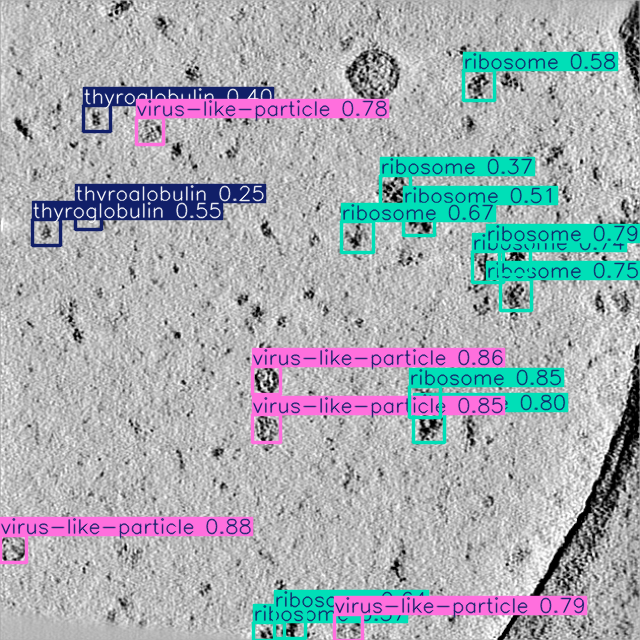

In [8]:
results = model("../../proc/yolo11/datasets/czii_det2d/images/val/TS_5_4_920.png")
results[0].show()

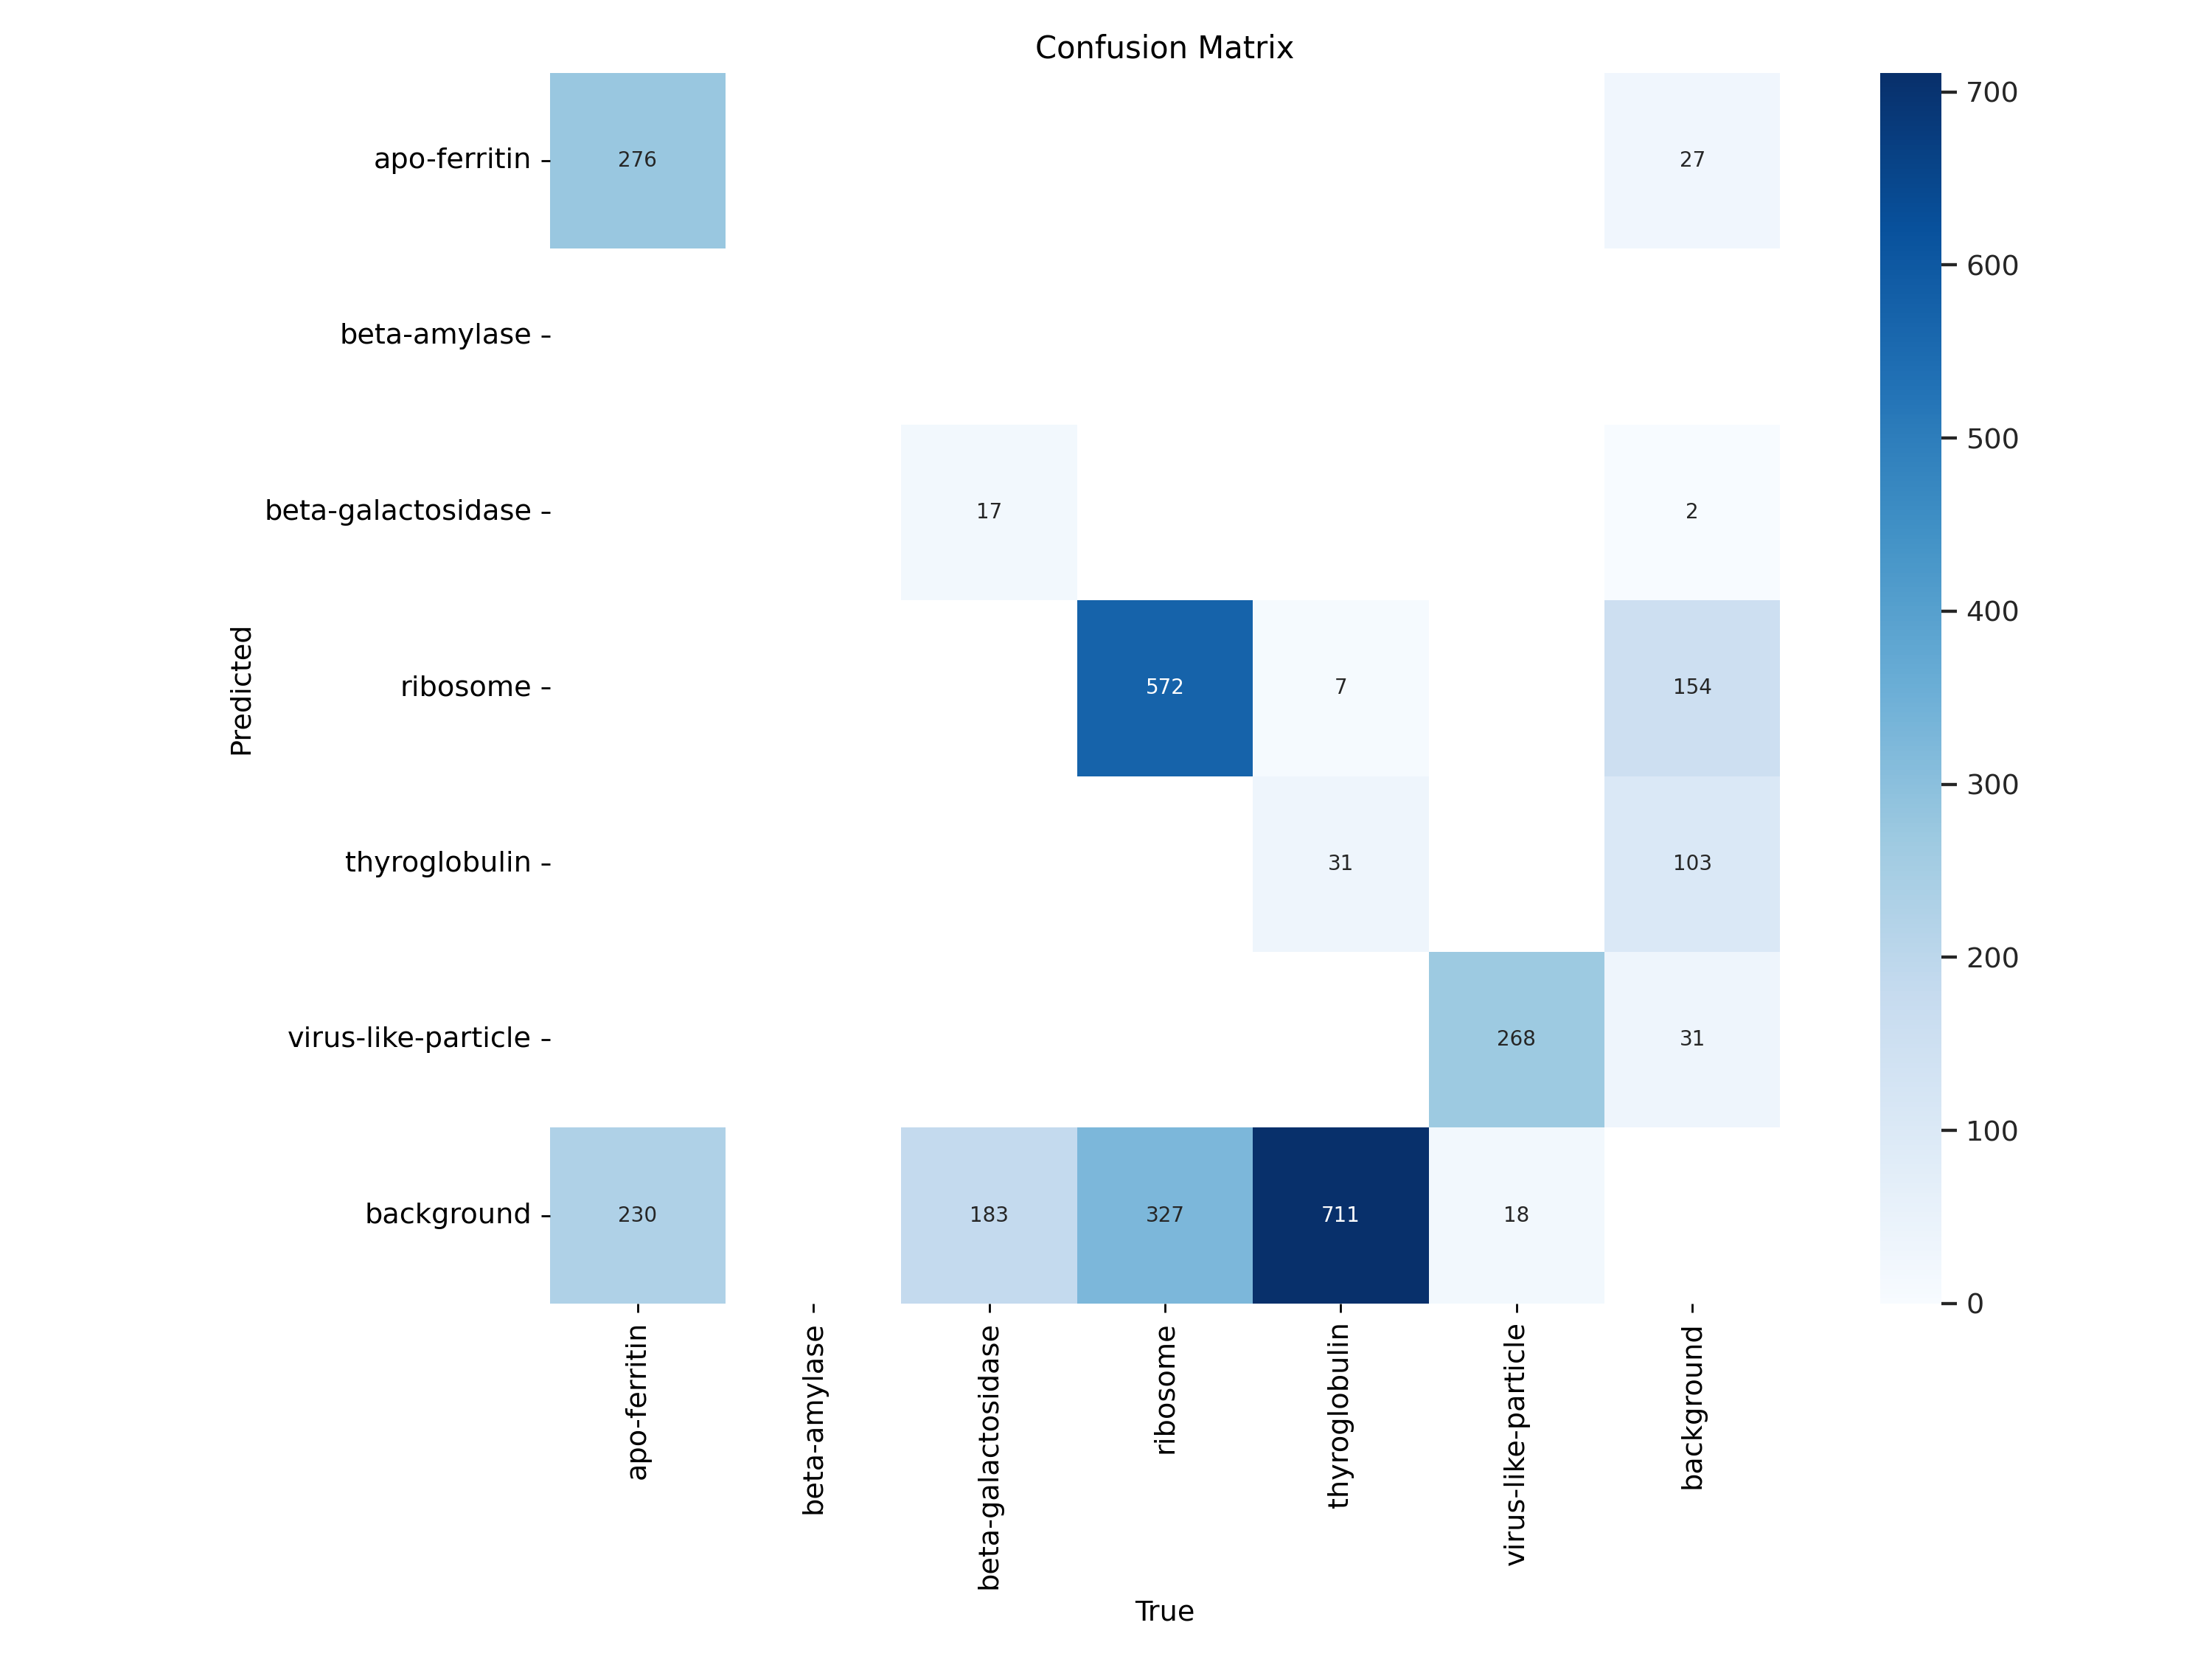

In [11]:
from IPython.display import Image as IPyImage

# Display the confusion matrix image from the specified directory in Kaggle
IPyImage(filename='../../runs/detect/train2/confusion_matrix.png', width=800)

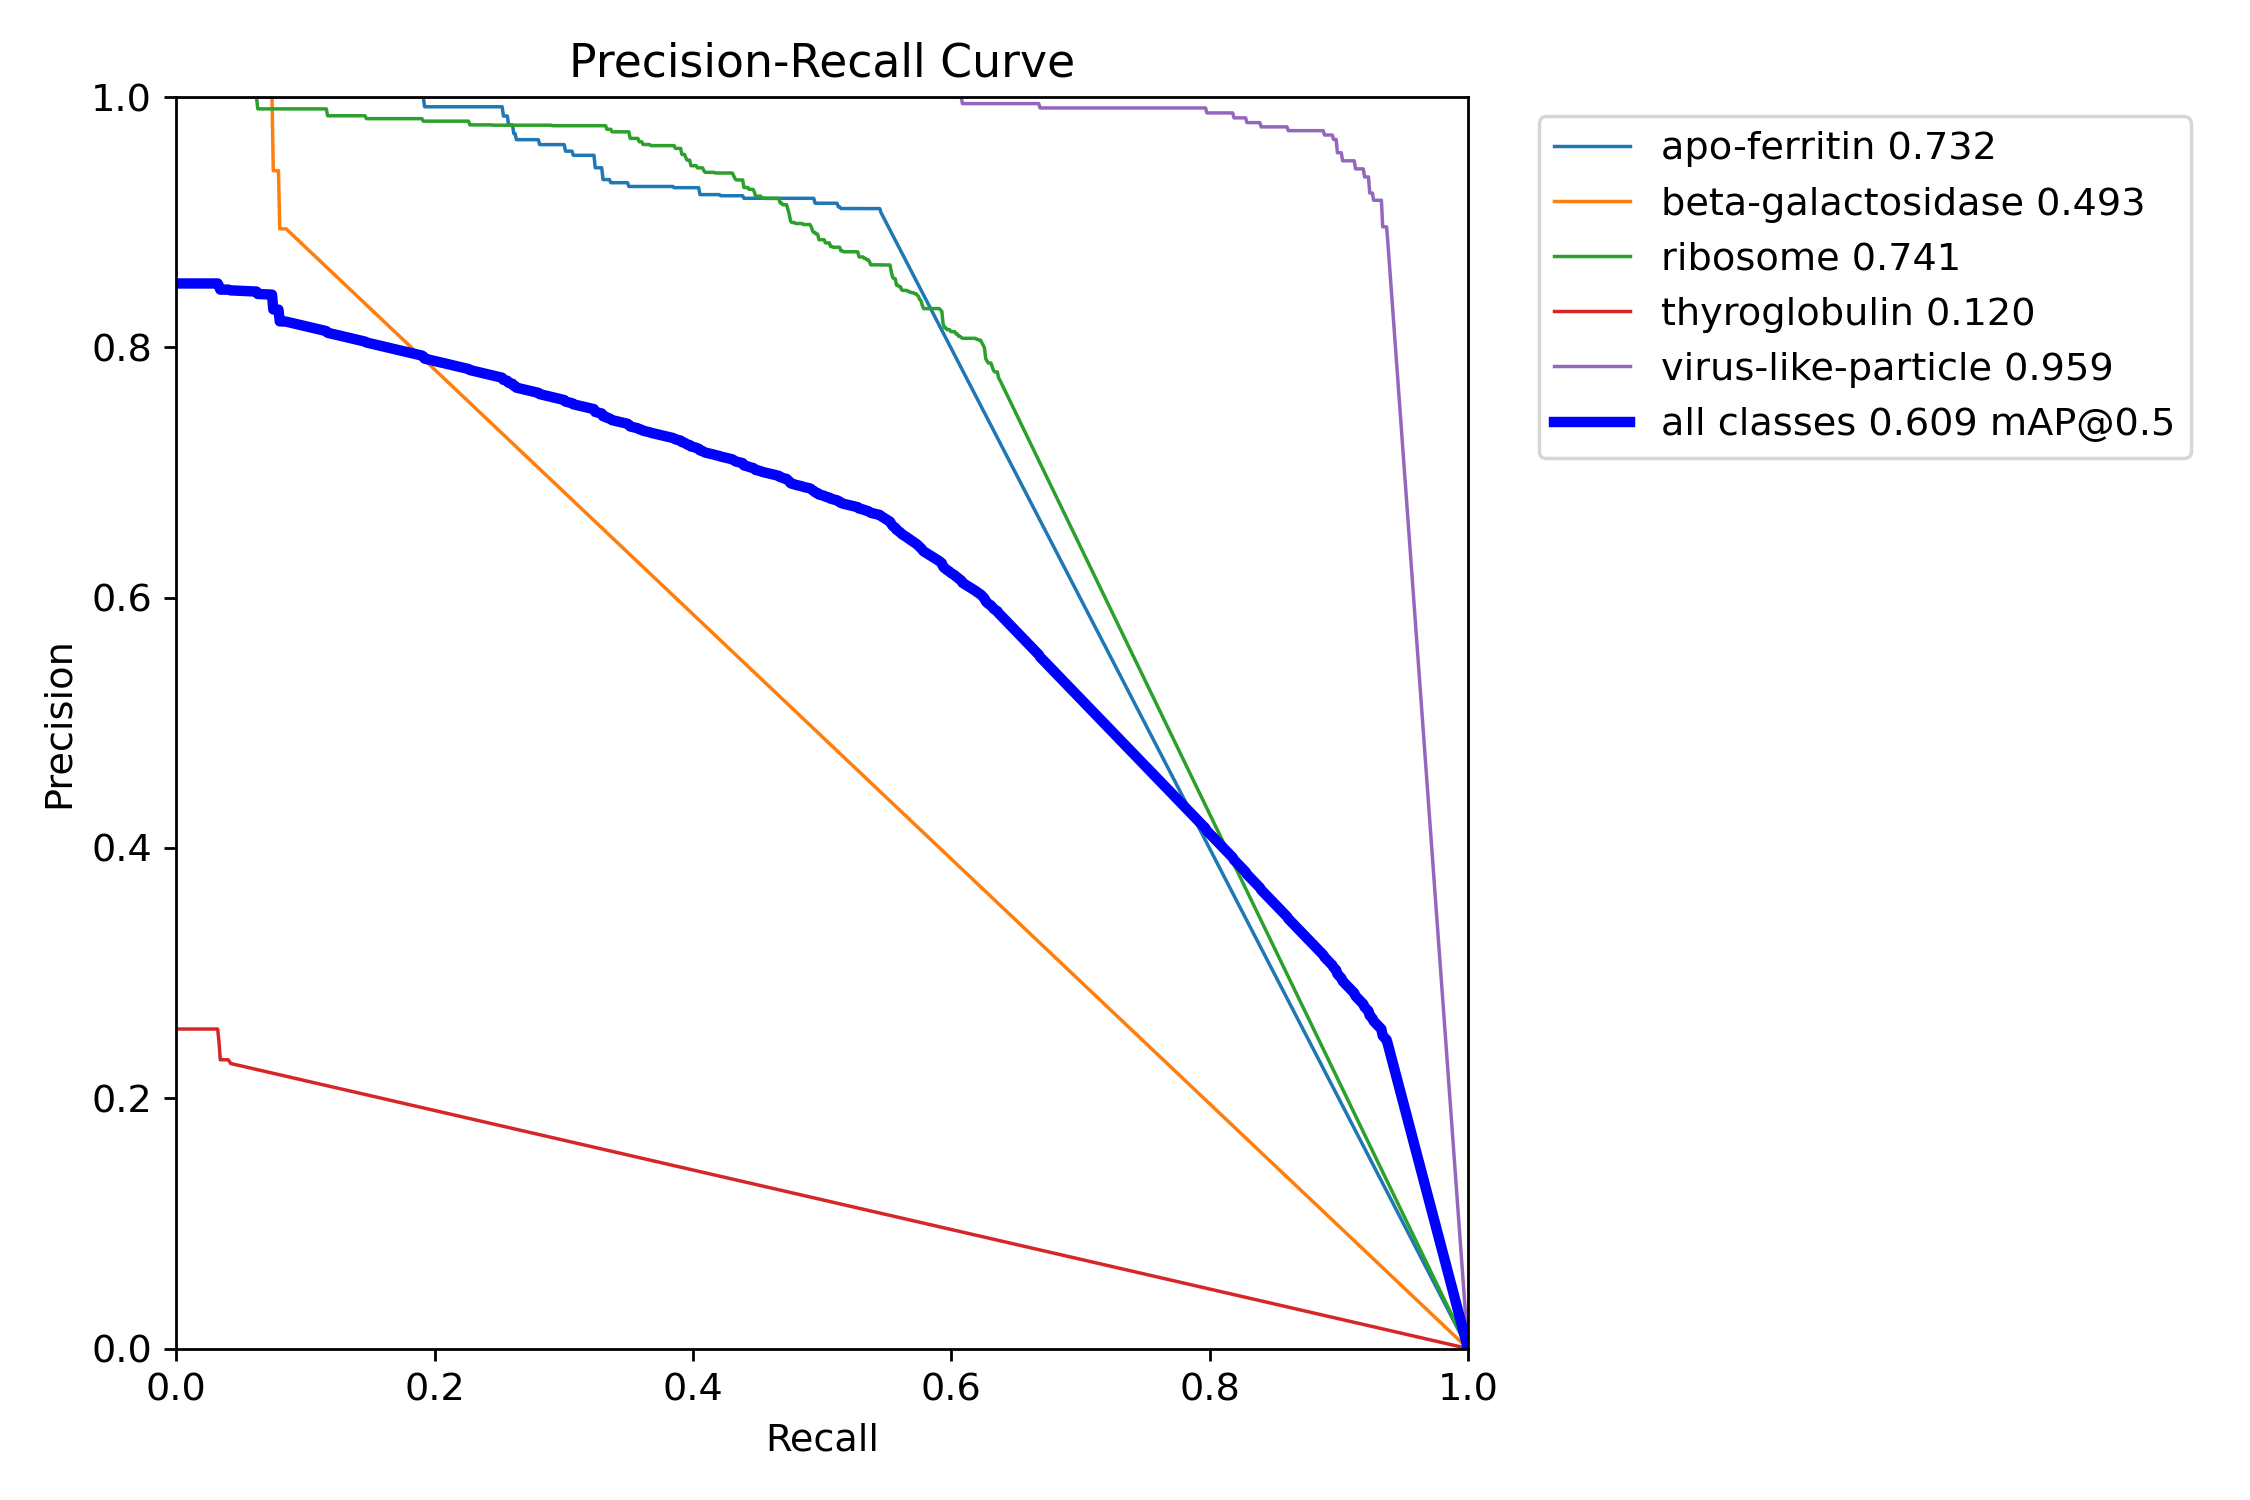

In [12]:
IPyImage(filename='../../runs/detect/val/PR_curve.png', width=800)

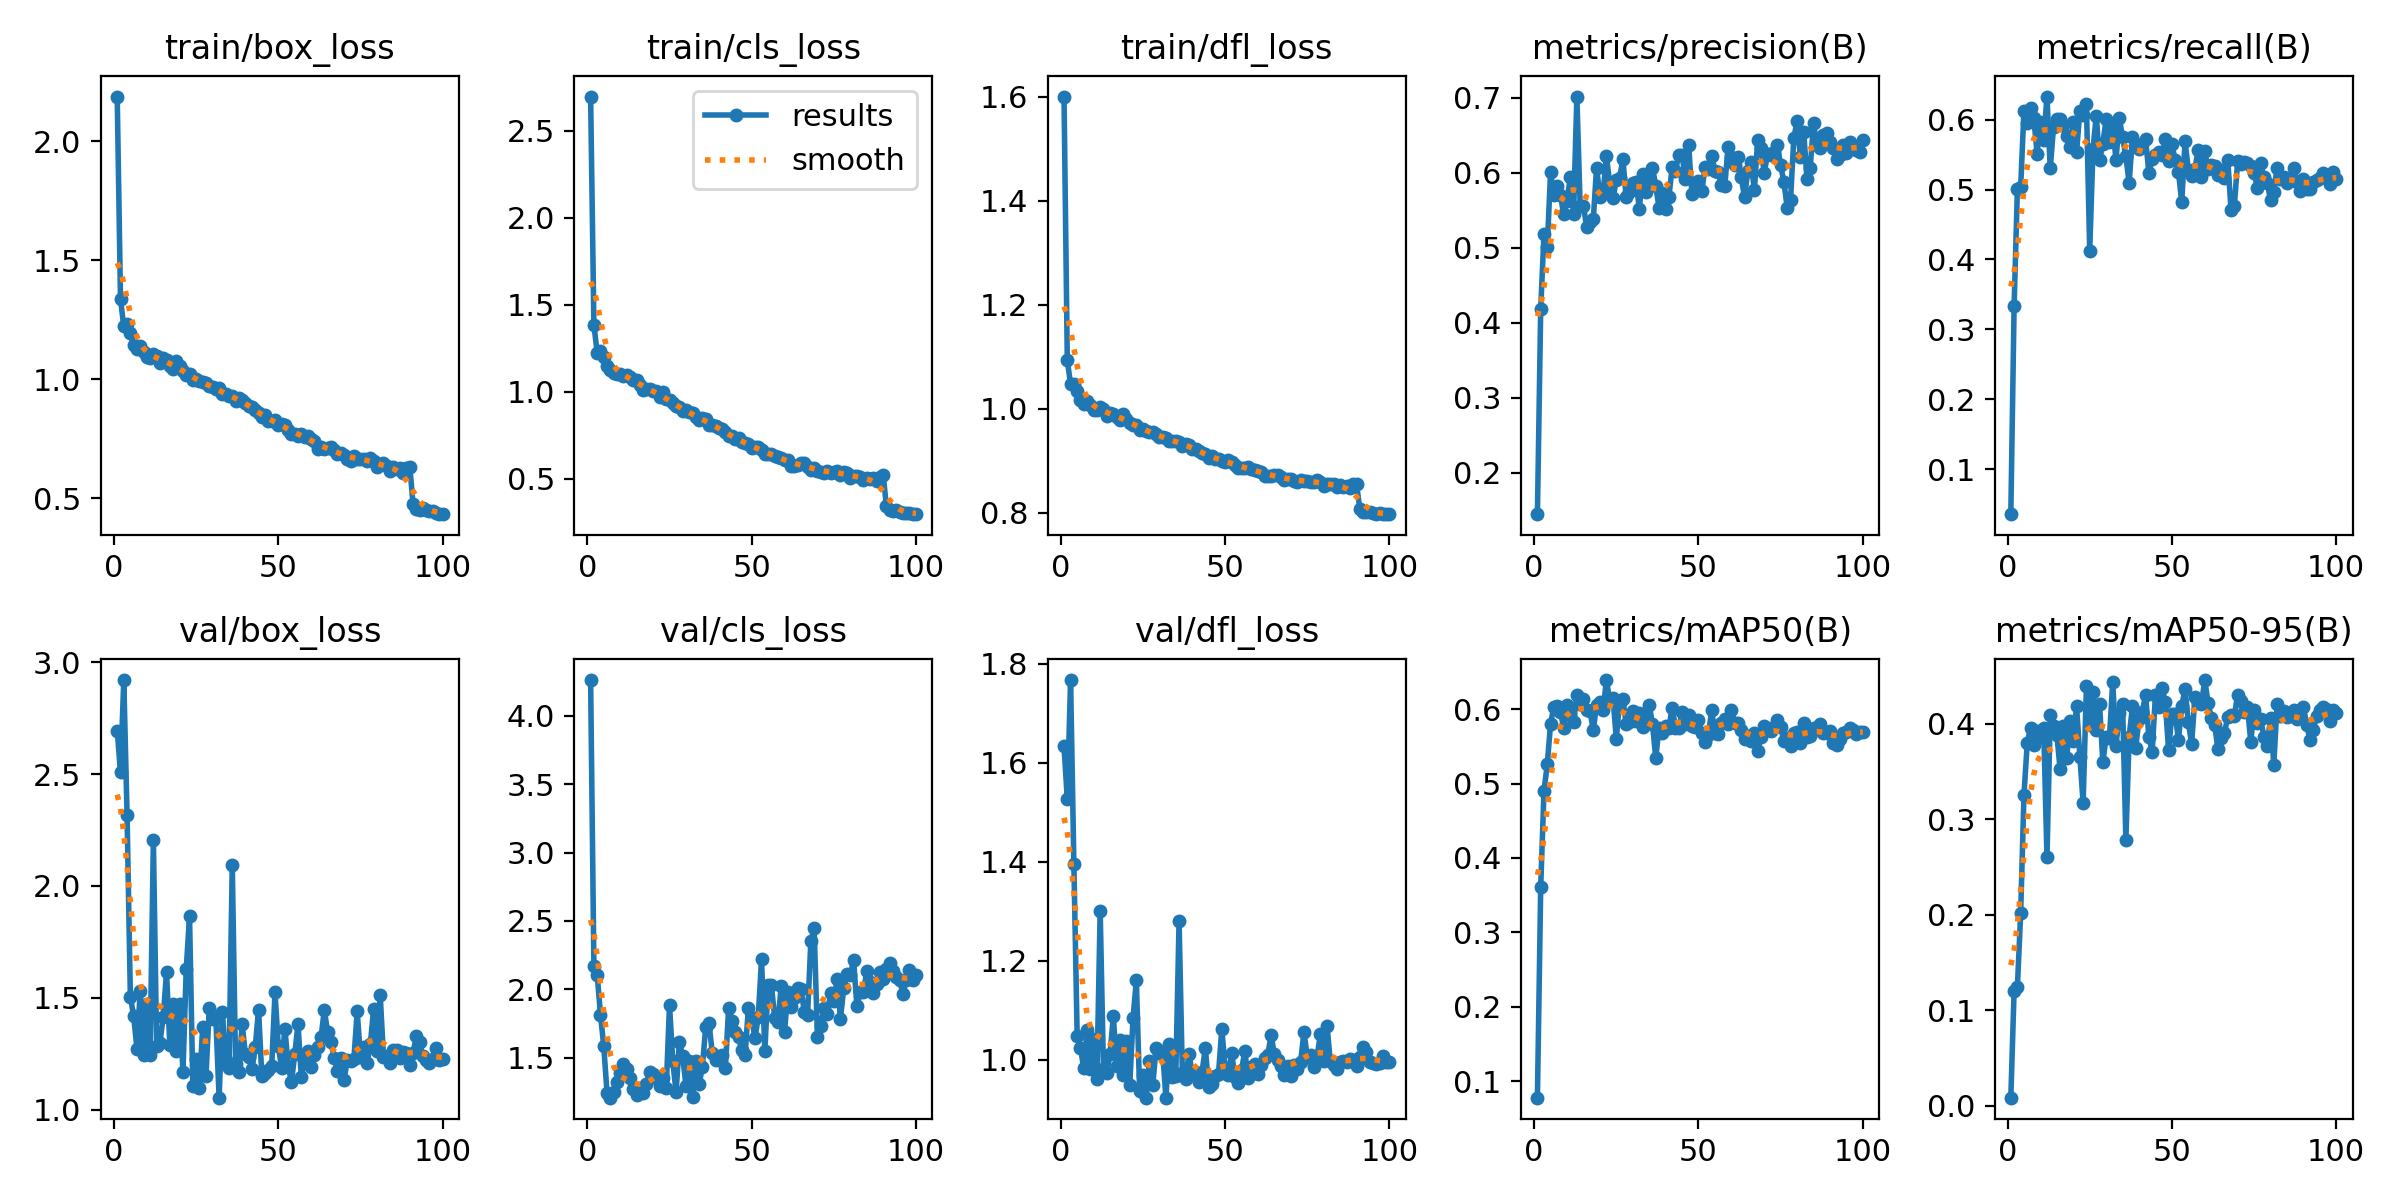

In [13]:
IPyImage(filename='../../runs/detect/train2/results.png', width=800)